# 1. Importing the required libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

# 2. Loading the dataset

In [28]:
df = pd.read_csv("./FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [29]:
featured_data = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]

featured_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


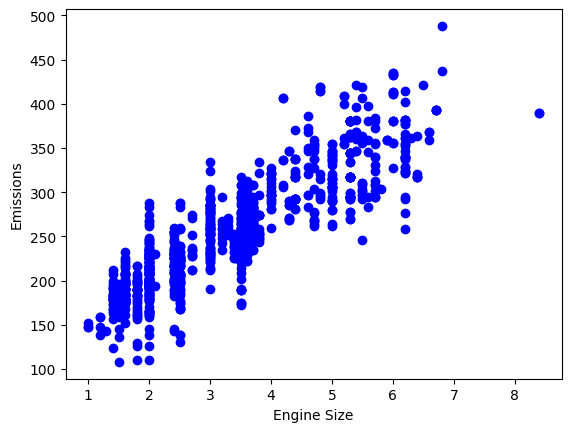

In [30]:
plt.scatter(featured_data.ENGINESIZE, featured_data.CO2EMISSIONS, color = "blue")
plt.xlabel("Engine Size")
plt.ylabel("Emissions")
plt.show()

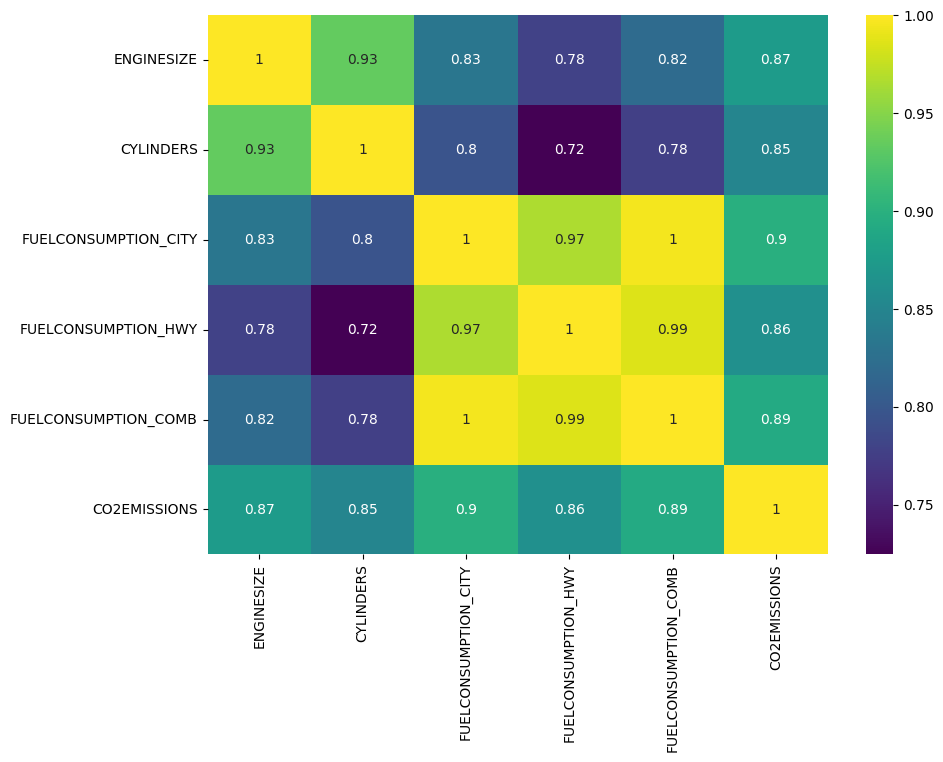

In [31]:
import seaborn as sns

plt.figure(figsize = (10, 7))

sns.heatmap(featured_data.corr(), annot = True, cmap = "viridis")
plt.show()

#### Note: we can see that multiple variables have great impact on the target variable. Thus, we should eliminate those with the least great effect.

In [32]:
featured_data.drop(["FUELCONSUMPTION_HWY", "FUELCONSUMPTION_CITY"], axis = 1, inplace = True)

C:\Users\Zaki Hamdard\AppData\Local\Temp\ipykernel_10156\1699987013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featured_data.drop(["FUELCONSUMPTION_HWY", "FUELCONSUMPTION_CITY"], axis = 1, inplace = True)


In [33]:
featured_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


# 3. Splitting the data

In [34]:
from sklearn.model_selection import train_test_split

x = featured_data.drop("CO2EMISSIONS", axis = 1)
y = featured_data["CO2EMISSIONS"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# 4. Modelling

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

y_preds = model.predict(x_test)

print("Coef: ", model.coef_)

print("intercept: ", model.intercept_)

Coef:  [11.2094395   7.15561381  9.5208118 ]
intercept:  67.3483851836209


# 5. Model Evaluation

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print("MSE: ", mean_squared_error(y_test, y_preds))
print("MAE: ", mean_absolute_error(y_test, y_preds))
print("r2_score: ", r2_score(y_test, y_preds))

MSE:  512.8551370148301
MAE:  16.721593983516485
r2_score:  0.875970520691407
